In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/australian-vehicle-prices/Australian Vehicle Prices.csv


In [ ]:
df = pd.read_csv('/kaggle/input/australian-vehicle-prices/Australian Vehicle Prices.csv')

In [ ]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [ ]:
df.describe(include='all')

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
count,16733,16733.000000,16733,16706,16733,16733,16733,16733,16733,16733,16733,16733,16733,16284,16733,16452,15130,15029,16731
unique,76,NaN,781,618,8804,3,3,106,5,9,157,14262,834,618,11,10,13,13,3794
top,Toyota,NaN,Hilux,SUV,2019 Hyundai I30 Active,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,-,- / -,White / -,"Minchinbury, NSW",4 cyl,SUV,4 Doors,5 Seats,29990
freq,2784,NaN,430,5921,60,14994,14530,3950,6978,6985,1697,449,2846,544,11506,6907,11191,11313,252
mean,NaN,2016.229248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.247705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Toyota is the common brand; Seen 2784 times.
Some columns were stored in an inappropriate format; converting for further analysis.

In [ ]:
df.Kilometres= pd.to_numeric(df.Kilometres,errors = 'coerce')
df.dropna(subset=['Doors','Seats','Price','CylindersinEngine'],inplace=True)
df.Doors = df.Doors.apply(lambda a: int(a.split()[0]))
df.Seats = df.Seats.apply(lambda a: int(a.split()[0]))
df.Price = pd.to_numeric(df.Price, errors = 'coerce')
df.CylindersinEngine = df.CylindersinEngine.apply(lambda a: int(a.split()[0]))

In [ ]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Door Count')

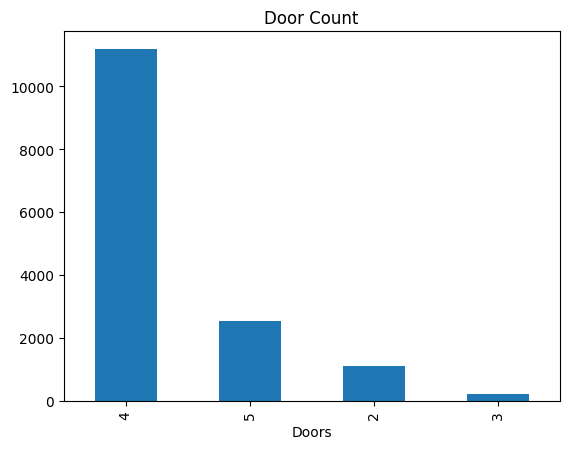

In [ ]:
df.Doors.value_counts().plot.bar()
plt.title("Door Count")

There are no duplicate entries.

Text(0.5, 1.0, 'Seat Count')

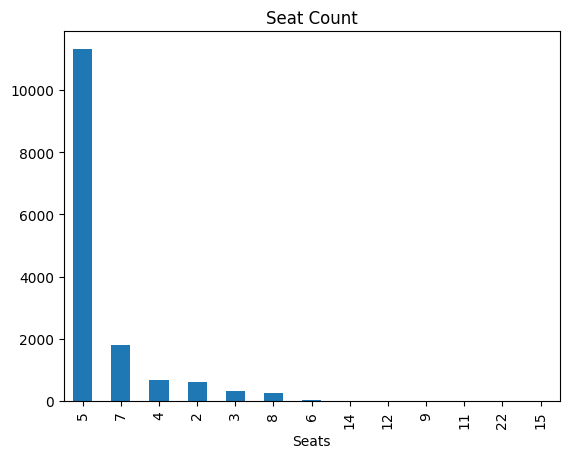

In [ ]:
df.Seats.value_counts().plot.bar()
plt.title('Seat Count')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15028 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              15028 non-null  object 
 1   Year               15028 non-null  float64
 2   Model              15028 non-null  object 
 3   Car/Suv            15015 non-null  object 
 4   Title              15028 non-null  object 
 5   UsedOrNew          15028 non-null  object 
 6   Transmission       15028 non-null  object 
 7   Engine             15028 non-null  object 
 8   DriveType          15028 non-null  object 
 9   FuelType           15028 non-null  object 
 10  FuelConsumption    15028 non-null  object 
 11  Kilometres         14481 non-null  float64
 12  ColourExtInt       15028 non-null  object 
 13  Location           14586 non-null  object 
 14  CylindersinEngine  15028 non-null  int64  
 15  BodyType           15028 non-null  object 
 16  Doors              15028 no

In [ ]:
df.isnull().sum()

Brand                  0
Year                   0
Model                  0
Car/Suv               13
Title                  0
UsedOrNew              0
Transmission           0
Engine                 0
DriveType              0
FuelType               0
FuelConsumption        0
Kilometres           547
ColourExtInt           0
Location             442
CylindersinEngine      0
BodyType               0
Doors                  0
Seats                  0
Price                 35
dtype: int64

Null entries found.

In [ ]:
df.dropna(subset=['Year'],inplace=True)

In [ ]:
import datetime as dt
df['Year']= df.Year.astype('int64')
df.Year.head()

0    2022
1    2022
2    2022
3    2011
4    2022
Name: Year, dtype: int64

In [ ]:
numerical = df.select_dtypes(exclude='object')

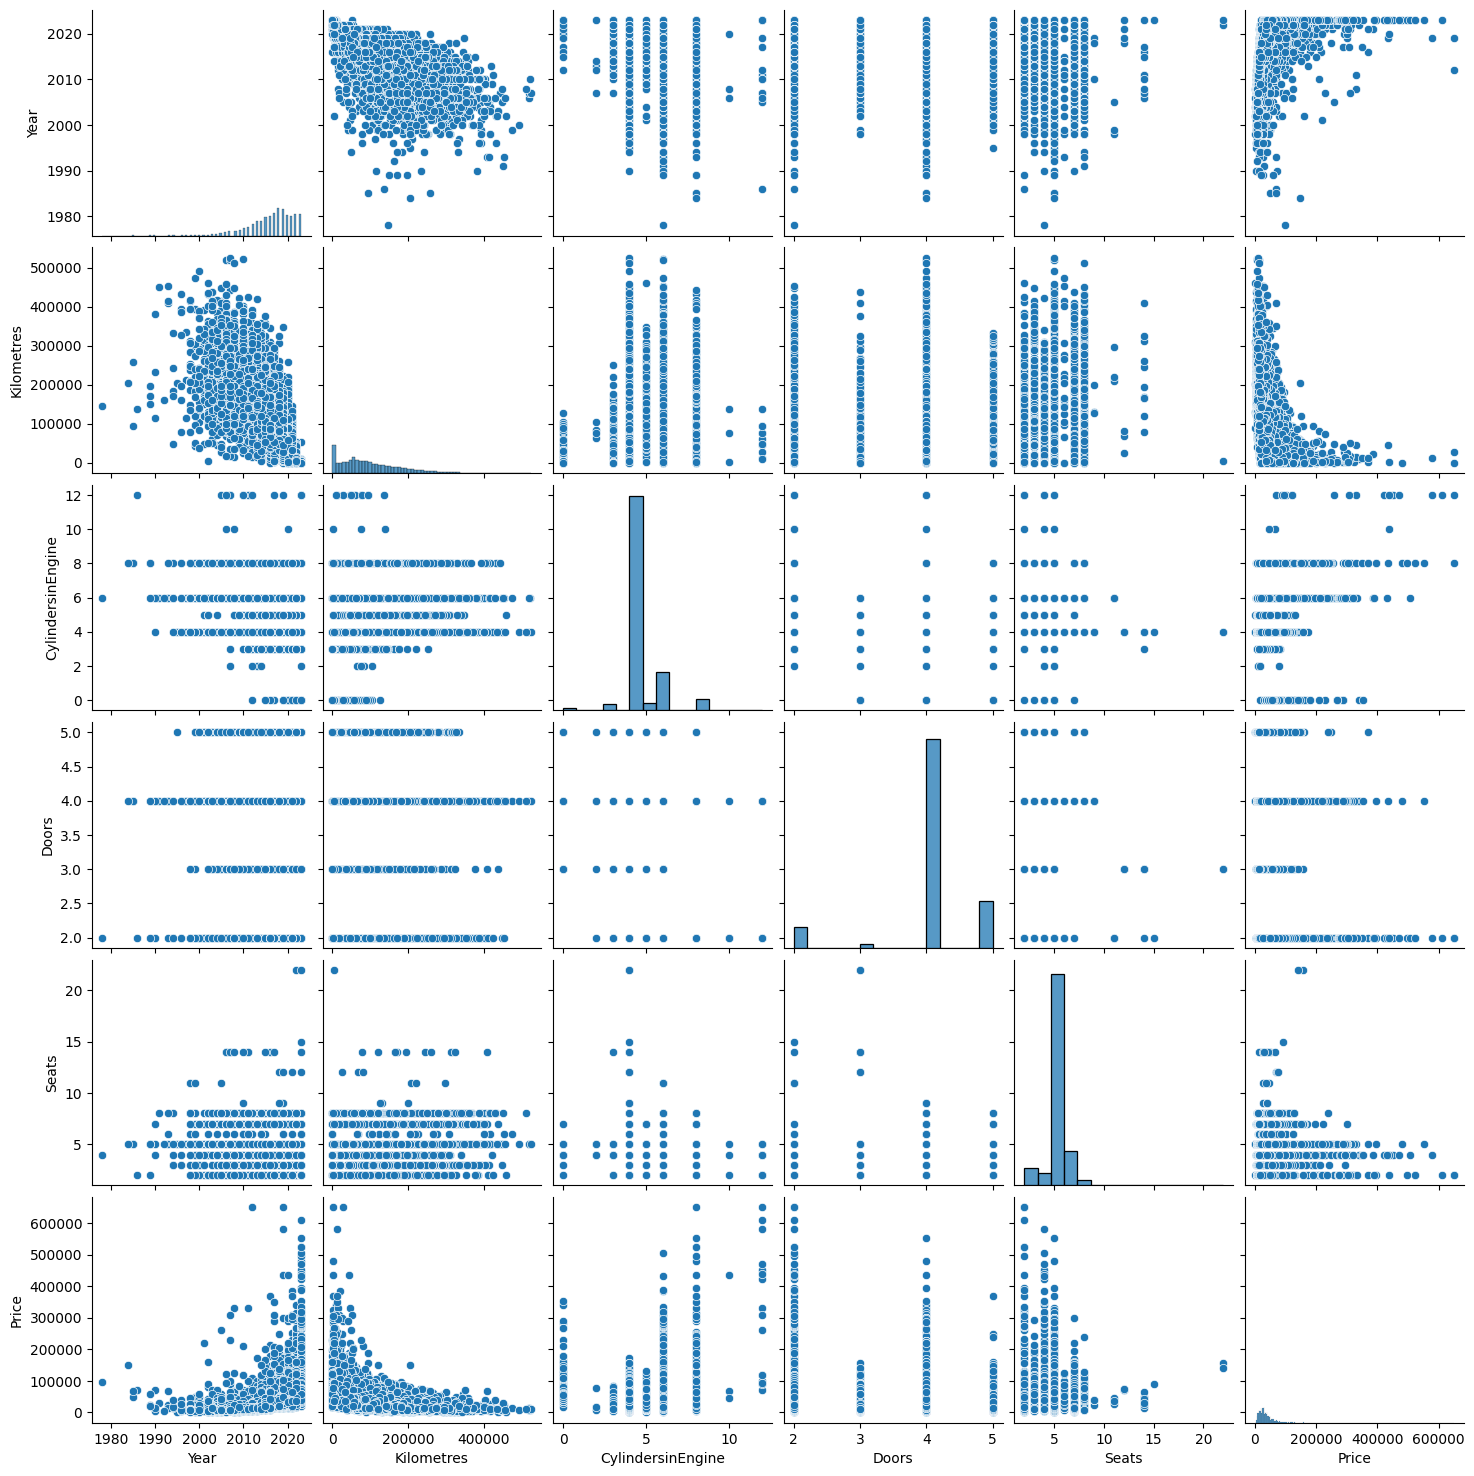

In [ ]:
sns.pairplot(numerical)

Observations: a correlation between price and year. the higher the year, the higher the price.
Cars with fewer seats seem to be pricier.

In [ ]:
df.FuelConsumption.value_counts()

FuelConsumption
7.4 L / 100 km     710
7.9 L / 100 km     518
7.3 L / 100 km     477
8.1 L / 100 km     442
7.6 L / 100 km     404
                  ... 
20.7 L / 100 km      1
18.3 L / 100 km      1
17.4 L / 100 km      1
19.1 L / 100 km      1
15.8 L / 100 km      1
Name: count, Length: 156, dtype: int64

Text(0.5, 1.0, 'Correlations')

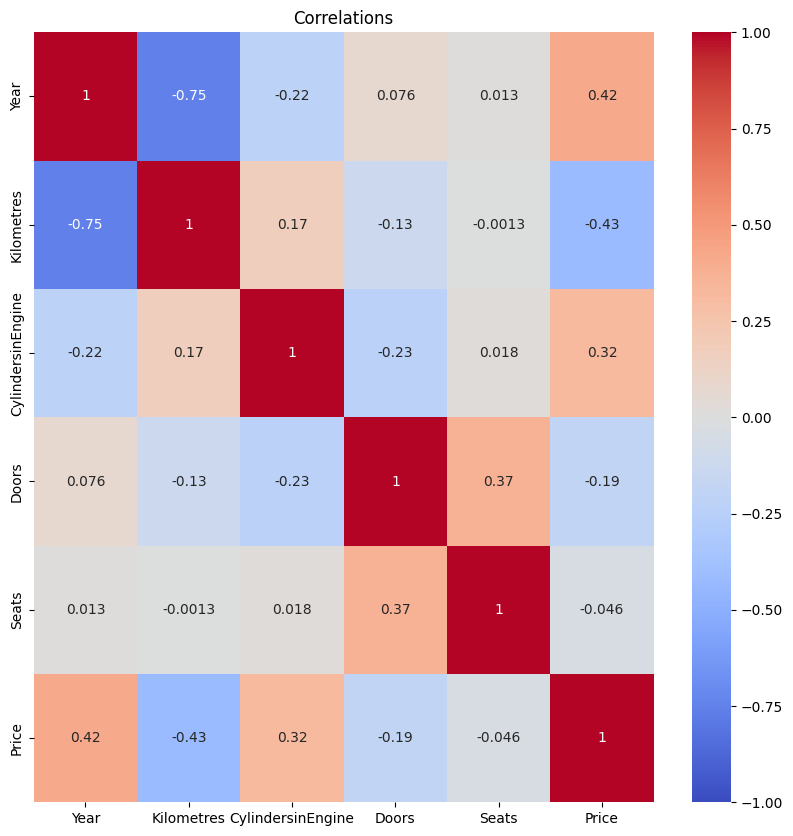

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical.corr(),cmap='coolwarm', annot=True, vmin=-1,vmax=1,center=0)
plt.title('Correlations')

In [ ]:
df.UsedOrNew.value_counts(normalize=True)*100

UsedOrNew
USED    89.945435
NEW      7.153314
DEMO     2.901251
Name: proportion, dtype: float64

In [ ]:
sum(df.UsedOrNew=='DEMO')

436

Randomly sampling 200 from used, new and demo categories of cars for analysis

In [ ]:
used = df[df.UsedOrNew=='USED'].sample(200, random_state = 40)
new = df[df.UsedOrNew=='NEW'].sample(200,random_state=40)
demo = df[df.UsedOrNew=='DEMO'].sample(200, random_state=40)

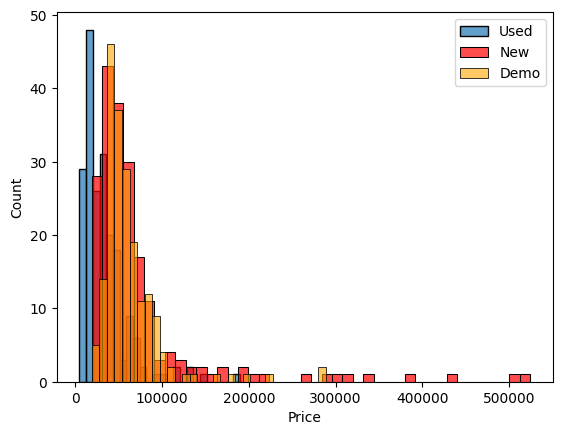

In [ ]:
sns.histplot(used.Price, label='Used', alpha=.7)
sns.histplot(new.Price, label='New', alpha=.7, color='red')
sns.histplot(demo.Price, label='Demo', alpha=.6, color = 'orange')
plt.legend()

There isnt much difference in prices; newer cars seem to be more expensive, more outliers.

In [ ]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [ ]:
from scipy.stats import zscore
def remove_outliers(col):
    if col.dtype =='object':
        return col
    else:
        zscores = zscore(col)
        return col[zscores<=3]
df2 = df.apply(remove_outliers,axis=1)


In [ ]:
df2.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,White / Black,"Caringbah, NSW",4,SUV,4,7,51990.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16.0,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472.0,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517.0,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035.0,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990.0


In [ ]:
brand_model = df2.groupby(['Brand','Model'])
brand_model['Price'].agg('mean').reset_index(name='Mean_price').groupby('Brand')[['Model','Mean_price']].agg('max')



,Model,Mean_price
Brand,,
Abarth,595,37490.000000
Alfa,Romeo,25319.000000
Aston,Martin,255347.250000
Audi,TT,304600.000000
BMW,Z4,294900.000000
...,...,...
Tata,Xenon,16990.000000
Tesla,Model,89528.230769
Toyota,Yaris,149084.000000


In [ ]:
x = brand_model['Price'].agg('mean').reset_index(name='Mean_price').groupby('Brand')[['Model','Mean_price']].agg('max')


Text(0.5, 1.0, 'Highest mean price of a model per Brand')

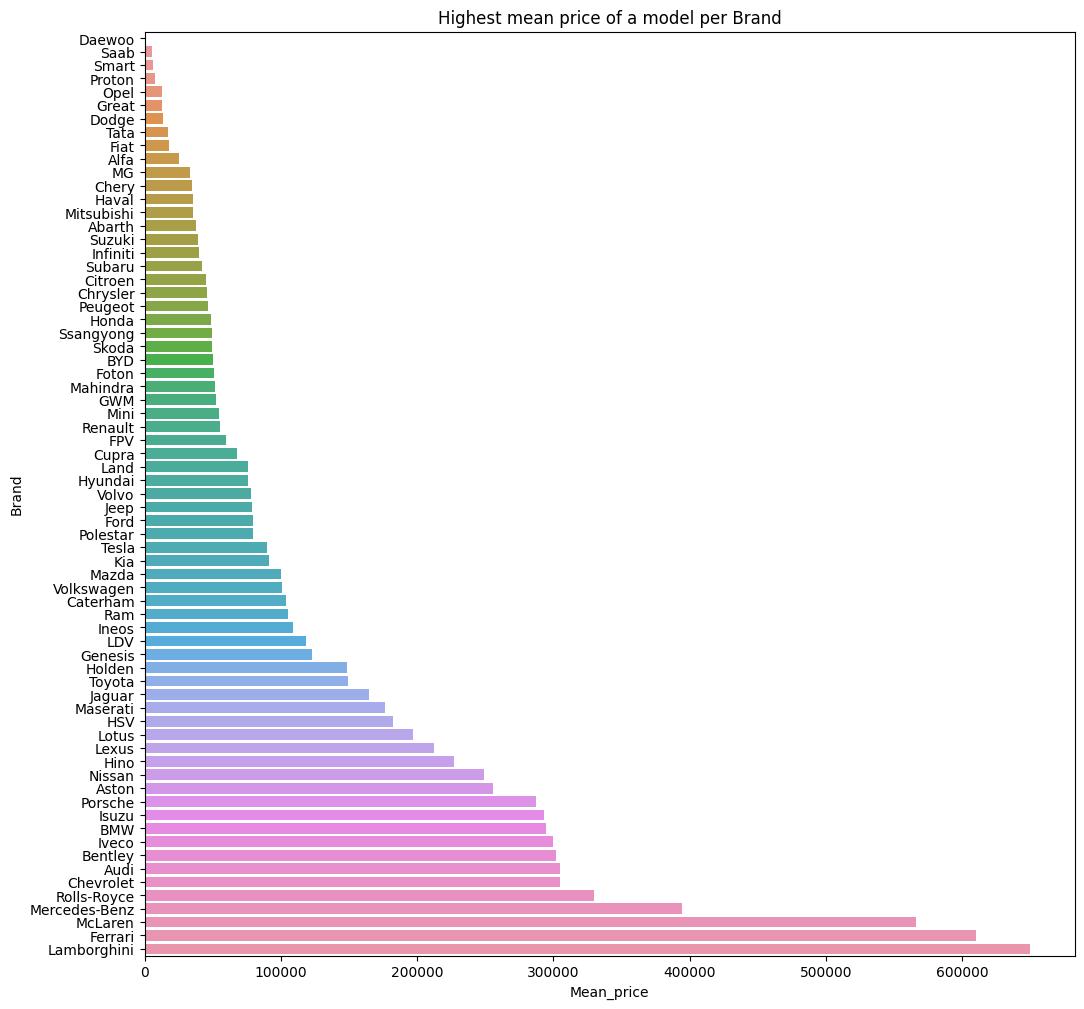

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(orient = 'h', y=x.index, x=x.Mean_price, order = x.sort_values(by='Mean_price').index)
plt.title('Highest mean price of a model per Brand')

Lamborghini is the priciest brand

In [ ]:
x.sort_values(by='Mean_price').head()

,Model,Mean_price
Brand,,
Daewoo,Lanos,900.0
Saab,3-Sep,5400.0
Smart,Fortwo,5985.0
Proton,S16,7990.0
Opel,Corsa,12995.0


Daewoo is the Cheapest brand.

In [ ]:
x.reset_index(inplace=True)
x['brand_model'] = x.apply(lambda col: '{}_{}'.format(col['Brand'],col['Model']),axis=1)

In [ ]:
x.head()

,Brand,Model,Mean_price,brand_model
0,Abarth,595,37490.00,Abarth_595
1,Alfa,Romeo,25319.00,Alfa_Romeo
2,Aston,Martin,255347.25,Aston_Martin
3,Audi,TT,304600.00,Audi_TT
4,BMW,Z4,294900.00,BMW_Z4


Text(0.5, 1.0, 'Highest mean price of a model per Brand (Brand_model)')

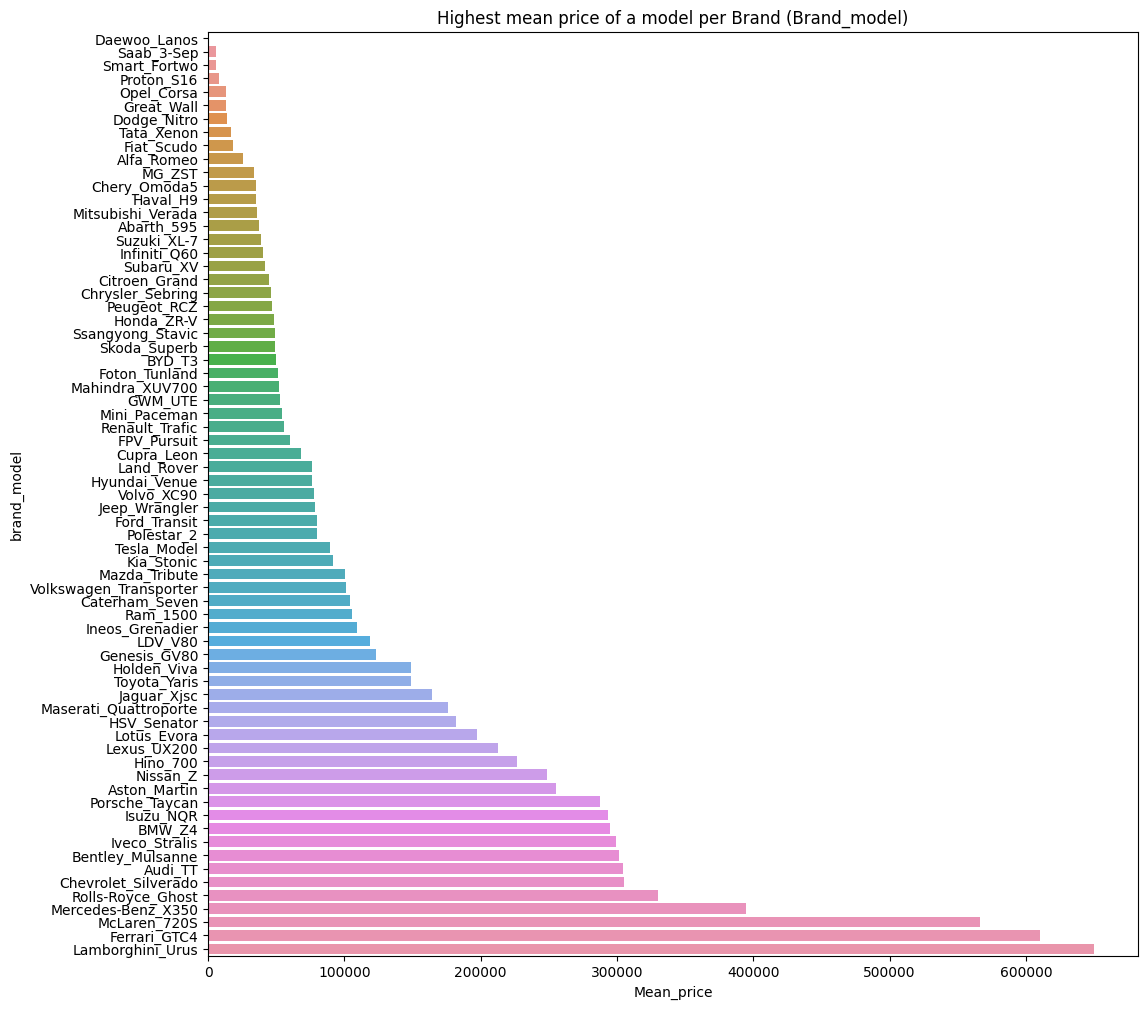

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(orient = 'h', y=x.brand_model, x=x.Mean_price, order = x.sort_values(by='Mean_price')['brand_model'])
plt.title('Highest mean price of a model per Brand (Brand_model)')

In [ ]:
df2.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [ ]:
by_year = df2.groupby('Year')

Text(0.5, 1.0, 'Mean Price per Year')

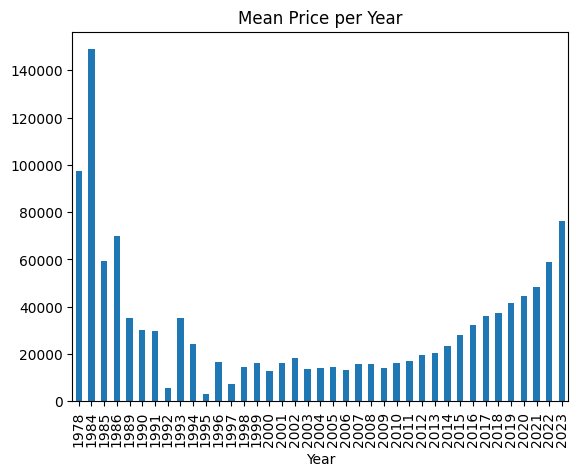

In [ ]:
by_year.Price.agg('mean').plot.bar()
plt.title('Mean Price per Year')

there is a clear increase in price from 1995; possible outliers in 1984

<Axes: xlabel='Price', ylabel='Year'>

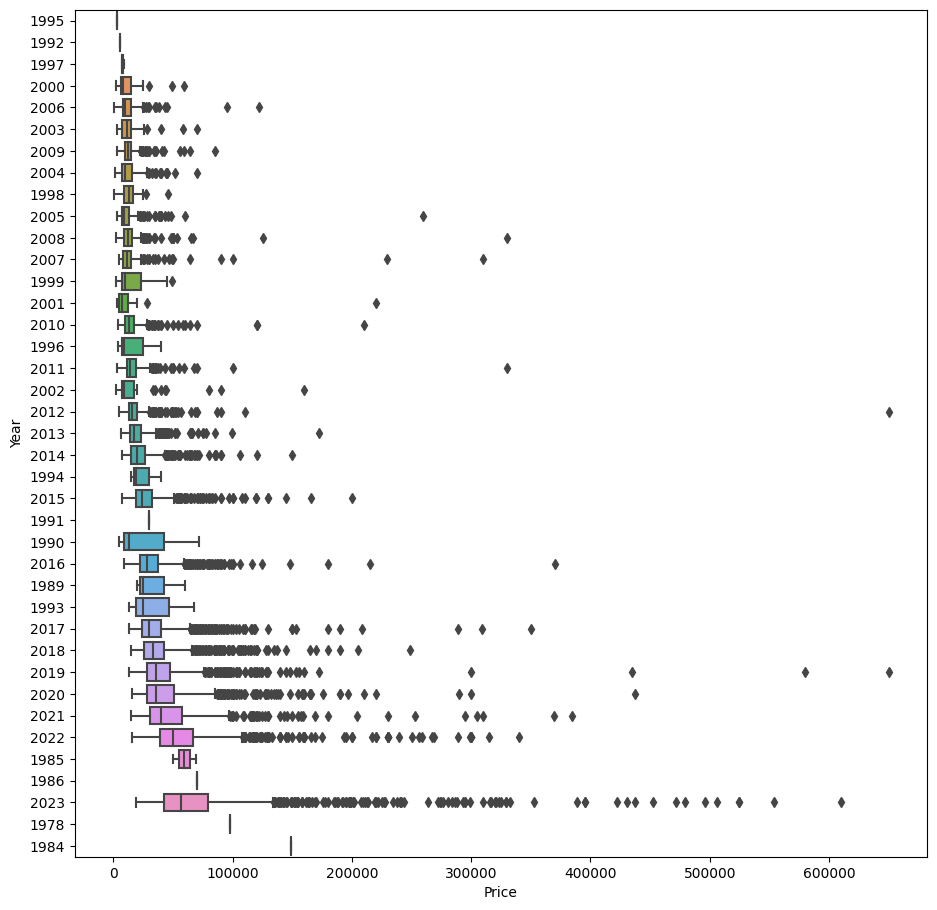

In [ ]:
plt.figure(figsize=(11,11))
sns.boxplot(orient='h',data= df2, y='Year', x='Price', order = df2.groupby('Year')['Price'].agg('mean').sort_values().index)

Text(0.5, 1.0, 'There is a Clear trend that shows the gradual increase in price each year.')

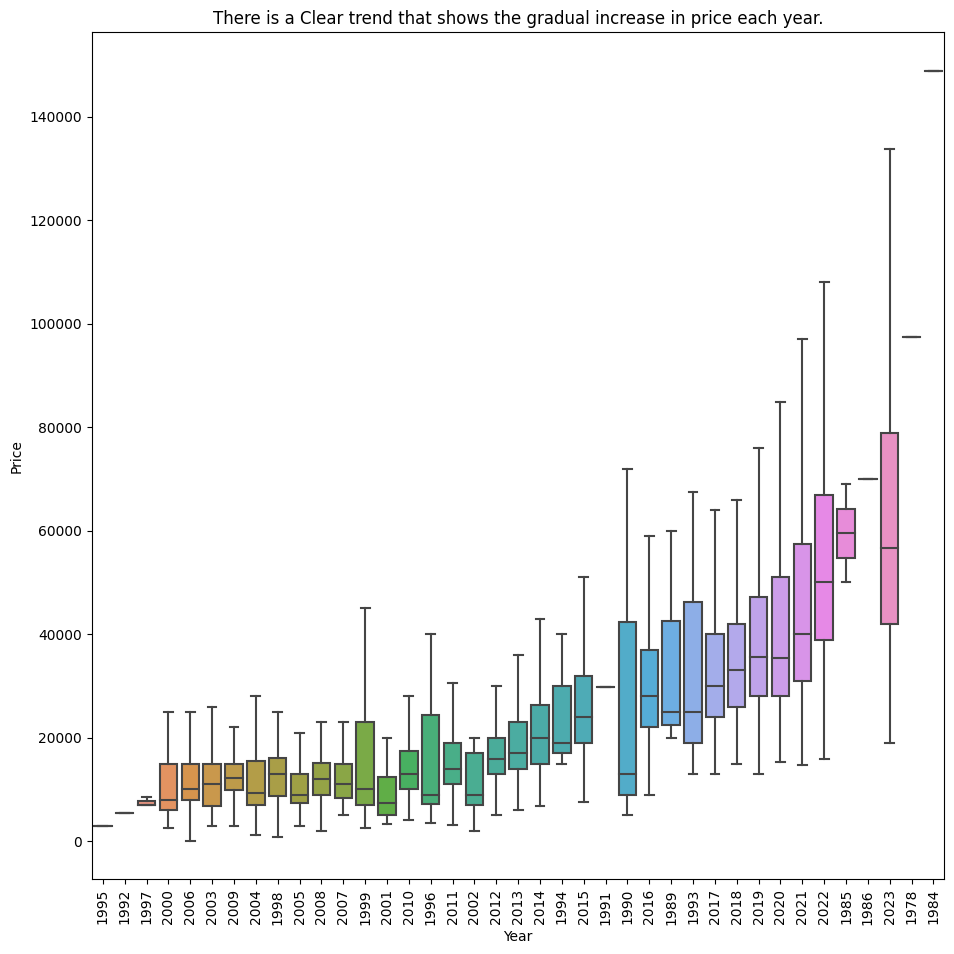

In [ ]:
plt.figure(figsize=(11,11))
sns.boxplot(data= df2, x='Year', y='Price', order = df2.groupby('Year')['Price'].agg('mean').sort_values().index, showfliers=False)
plt.xticks(rotation=90)
plt.title('There is a Clear trend that shows the gradual increase in price each year.')

In [ ]:
df2.groupby(['Brand','FuelConsumption']).FuelConsumption.agg('count')

Brand   FuelConsumption
Abarth  5.8 L / 100 km     1
        6 L / 100 km       1
Alfa    10.2 L / 100 km    1
        5.5 L / 100 km     1
        5.6 L / 100 km     1
                          ..
Volvo   8.5 L / 100 km     3
        8.7 L / 100 km     6
        9.1 L / 100 km     2
        9.2 L / 100 km     1
        9.6 L / 100 km     6
Name: FuelConsumption, Length: 1487, dtype: int64

Text(0.5, 1.0, 'Increasing Trend of Price per year')

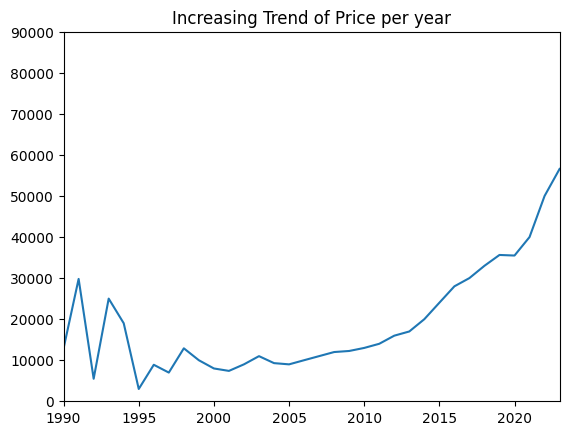

In [ ]:
medians = df2.groupby('Year').Price.agg('median')
plt.plot(df2.groupby('Year')['Price'].mean().index,medians)
plt.axis([1990,2023,0,90000])
plt.title('Increasing Trend of Price per year')

In [ ]:
df2['FuelConsumption'] = df2.FuelConsumption.apply(lambda a: float(a.split('L')[0]))

In [ ]:
df2.FuelConsumption.value_counts(normalize=True)*100

FuelConsumption
7.4     4.724514
7.9     3.446899
7.3     3.174075
8.1     2.941176
7.6     2.688315
          ...   
20.7    0.006654
18.3    0.006654
17.4    0.006654
19.1    0.006654
15.8    0.006654
Name: proportion, Length: 156, dtype: float64

Text(0.5, 1.0, 'Median Fuel Consumption per Year')

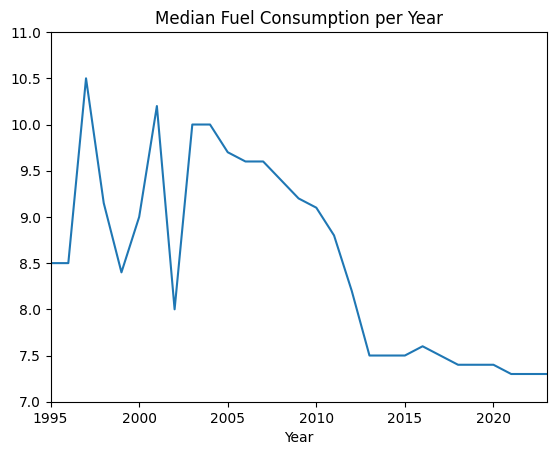

In [ ]:
df2.groupby('Year')['FuelConsumption'].agg('median').plot()
plt.axis([1995,2023,7,11])
plt.title('Median Fuel Consumption per Year')

In [ ]:
brand_fuel = df2.groupby('Brand')['FuelConsumption'].agg('mean').reset_index(name='mean')

In [ ]:
brand_fuel.loc[brand_fuel['mean']==brand_fuel['mean'].max()]

,Brand,mean
6,Bentley,16.366667


Bentley has the highest average fuel consumption

In [ ]:
brand_fuel['mean'] = brand_fuel['mean'].replace(0.0,None)
brand_fuel.dropna(inplace=True)
brand_fuel.loc[(brand_fuel['mean']==brand_fuel['mean'].min())]

,Brand,mean
9,Chevrolet,4.4


Chevrolet has the minimum average fuel consumption that isnt 0.